# Lecture 11: Classifier Model Evalutation Metrics
These notes build off the code we wrote in lecture 10.

![Machine learning diagram](./ml_diagram.png)

### First, set up a virtual environment (venv)

In the terminal (or command line interface), run this command to create a virtual environment: `python -m venv venv` or `python3 -m venv venv`

To start the virtual environment with a mac run the command: `source venv/bin/activate` <br>
To start the virtual environment with a PC and git bash run the command: `source venv/Scripts/activate`


Check which python environment you are in using the command: `which python`

The purpose of virtual environments is to allow you to install different versions of python packages for different projects on your computer. I recommend setting up a virtual environment before installing Python packages.

### Install the dependencies

The packages required to run this repository are in requirements.txt

To install them, run the command:

`pip install -r requirements.txt`

### Set up imports

In [1]:
# import pandas, matplotlib, and the neccessary functions from scikit-learn
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

/var/folders/rt/6n0vbsp923xg2bbmtt_k12900000gn/T/ipykernel_6069/408836033.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Load dataset

In [2]:
# Load the dataset using pandas and the read_csv function
thyroid_df = pd.read_csv('data/thyroid_data.csv')

thyroid_df.head()


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
# inspect the shape of the dataframe
thyroid_df.shape

(383, 17)

In [4]:
# inspect the fraction of rows where Recurred is 'Yes' or 'No' using the value_counts method
thyroid_df['Recurred'].value_counts(normalize=True)

Recurred
No     0.718016
Yes    0.281984
Name: proportion, dtype: float64

### Data preprocessing (one hot encoding)
Transform categorical features into a ML-compatible format

In [5]:
# make a list of the columns names of categorical features
columns_to_exclude = ['Age', 'Recurred']

categorical_columns = [col for col in thyroid_df.columns if col not in columns_to_exclude]

categorical_columns


['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response']

In [6]:
# Define a scikit learn column transformer that will encode the categorical columns using the OneHotEncoder
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'  # This leaves the excluded columns unchanged
)

# Apply the transformer to the DataFrame using the fit_transform method
transformed_data = column_transformer.fit_transform(thyroid_df)

type(transformed_data)

numpy.ndarray

In [8]:
# get the names of the encoded features using the get_feature_names_out function
encoded_feature_names = column_transformer.named_transformers_['encoder'].get_feature_names_out(categorical_columns)

encoded_feature_names

array(['Gender_F', 'Gender_M', 'Smoking_No', 'Smoking_Yes',
       'Hx Smoking_No', 'Hx Smoking_Yes', 'Hx Radiothreapy_No',
       'Hx Radiothreapy_Yes', 'Thyroid Function_Clinical Hyperthyroidism',
       'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Diffuse goiter',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left',
       'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right',
       'Pathology_Follicular', 'Pathology_Hurthel cell',
       'Pathology_Micropapillary', 'Pathology_Papillary',
       'Focality_Multi-Focal', 'Focality_Uni-Focal', 'Risk_High',
       'Risk_Intermediate', '

In [9]:
# make a list of all the feature names to use as column values in the DataFrame
all_feature_names = list(encoded_feature_names) + ['Age', 'Recurred']

all_feature_names

['Gender_F',
 'Gender_M',
 'Smoking_No',
 'Smoking_Yes',
 'Hx Smoking_No',
 'Hx Smoking_Yes',
 'Hx Radiothreapy_No',
 'Hx Radiothreapy_Yes',
 'Thyroid Function_Clinical Hyperthyroidism',
 'Thyroid Function_Clinical Hypothyroidism',
 'Thyroid Function_Euthyroid',
 'Thyroid Function_Subclinical Hyperthyroidism',
 'Thyroid Function_Subclinical Hypothyroidism',
 'Physical Examination_Diffuse goiter',
 'Physical Examination_Multinodular goiter',
 'Physical Examination_Normal',
 'Physical Examination_Single nodular goiter-left',
 'Physical Examination_Single nodular goiter-right',
 'Adenopathy_Bilateral',
 'Adenopathy_Extensive',
 'Adenopathy_Left',
 'Adenopathy_No',
 'Adenopathy_Posterior',
 'Adenopathy_Right',
 'Pathology_Follicular',
 'Pathology_Hurthel cell',
 'Pathology_Micropapillary',
 'Pathology_Papillary',
 'Focality_Multi-Focal',
 'Focality_Uni-Focal',
 'Risk_High',
 'Risk_Intermediate',
 'Risk_Low',
 'T_T1a',
 'T_T1b',
 'T_T2',
 'T_T3a',
 'T_T3b',
 'T_T4a',
 'T_T4b',
 'N_N0',
 'N_

In [10]:
# create a dataframe using the transformed data with column names from the all_feature_names list
transformed_df = pd.DataFrame(transformed_data, columns=all_feature_names)

transformed_df.head()


,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,...,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Age,Recurred
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,No
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34,No
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30,No
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No


In [11]:
# inspect the shape of the transformed dataframe
transformed_df.shape

(383, 56)

### Data preprocessing (split data into training and testing data)

In [12]:
# split the transformed dataframe into a features dataframe and target series
X = transformed_df.drop('Recurred', axis=1)

y = transformed_df['Recurred']


# inspect feature dataframe
X.head()



,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,...,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Age
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62


In [13]:
# inspect target series
y.head()

0    No
1    No
2    No
3    No
4    No
Name: Recurred, dtype: object

In [14]:
# split into training and testing sets. The training set should have 283 samples, and the testing set should have 100 samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)

In [15]:
# validate that the training and testing sets have the correct number of samples
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((283, 55), (100, 55), (283,), (100,))

### Using the training data to perform grid search to find the best hyperparameters

In [16]:
# Define the parameter grid
param_grid = {
    'class_weight': ['balanced'],  # Assuming you want to keep this fixed
    'criterion': ['gini', 'entropy'],  # Assuming you want to keep this fixed
    'max_depth': [2, 4, 8],  # Exploring values around 4
    'max_features': ['sqrt'],  # Assuming you want to keep this fixed
    'n_estimators': [30, 60, 90]  # Exploring values around 60
}


In [17]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=2, scoring='accuracy')

# Fit the GridSearchCV object to your data (X_train, y_train)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8], 'max_features': ['sqrt'],
                         'n_estimators': [30, 60, 90]},
             scoring='accuracy')

In [18]:
# Get and print the best parameters found by the GridSearchCV using the best_params_
best_params = grid_search.best_params_

best_params

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 60}

In [19]:
# Get the accuracy score of the model with the best parameters
best_score = grid_search.best_score_

best_score

0.9611926880431525

### Train a model using the best set of hyperparameters

In [20]:
# Initialize a new RandomForestClassifier model with the best parameters
final_model = RandomForestClassifier(
  class_weight='balanced', 
  criterion='entropy',
  max_depth=8,
  max_features='sqrt',
  n_estimators=90,
)


# Fit the model on your training data
final_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, n_estimators=90)

### Test the model with the testing data

In [21]:
# use the score function to get the accuracy of the model on the testing data
final_model.score(X_test, y_test)

0.97

### Get a plot the feature importances

In [22]:
# create a dataframe of the feature importances
feature_importances = final_model.feature_importances_

feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# sort the dataframe so the most important features are at the top
feature_importances_df.sort_values('importance', ascending=False, inplace=True)

feature_importances_df.head()


,feature,importance
53,Response_Structural Incomplete,0.230900
32,Risk_Low,0.125880
51,Response_Excellent,0.112062
21,Adenopathy_No,0.054678
42,N_N1b,0.044519


<Axes: xlabel='feature'>

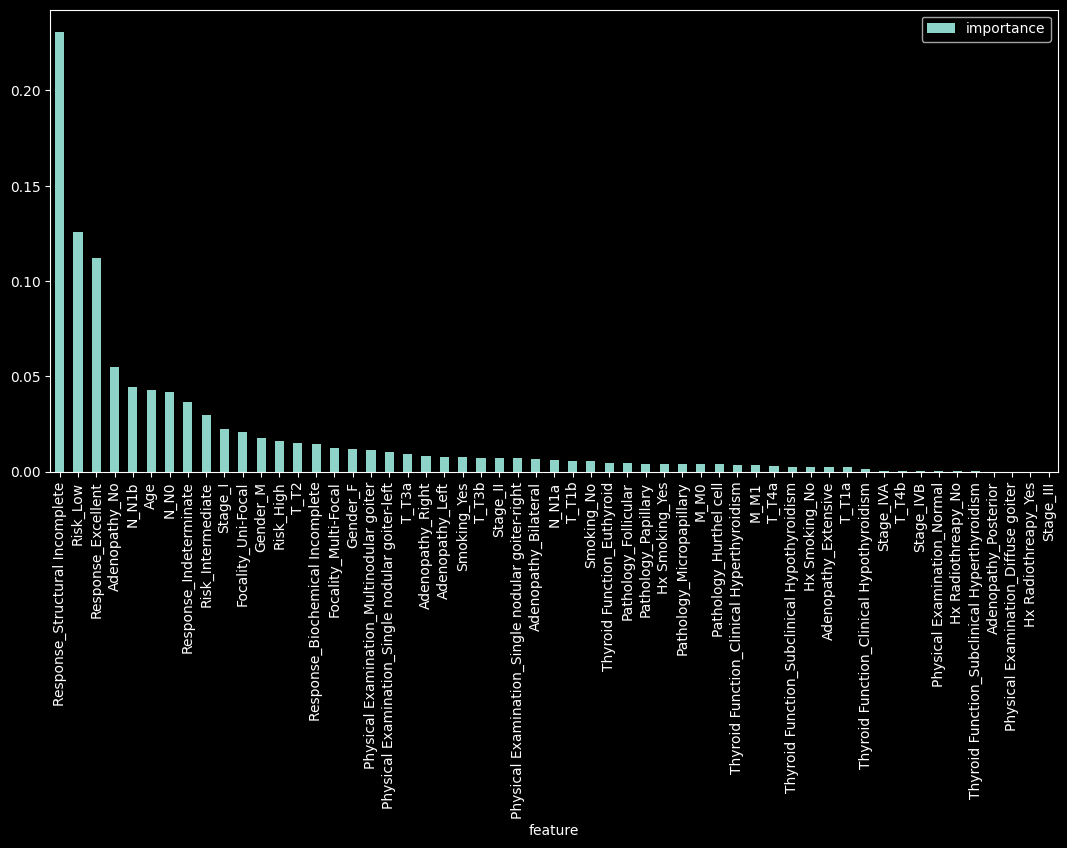

In [23]:
# plot the feature importances as a bar chart using .plot.bar()
feature_importances_df.plot.bar(x='feature', y='importance', rot=90, figsize=(13, 6))

# Start Lecture 11
### Let's look at the confusion matrix

In [26]:
# look at the confusion matrix for the random forest model
from sklearn.metrics import confusion_matrix

y_pred = final_model.predict(X_test)

con_matrix = confusion_matrix(y_test, y_pred, labels=['Yes', 'No'])

con_matrix

array([[27,  2],
       [ 1, 70]])

In [27]:
# look at the values of the confusion matrix
tn, fp, fn, tp = con_matrix.ravel()

tn, fp, fn, tp

(27, 2, 1, 70)

### Get the associated evaluation metrics

In [28]:
# get sensitivity (true positive rate, recall) from the confusion matrix
sensitivity = tp / (tp + fn)

sensitivity

0.9859154929577465

In [29]:
# get specificity (true negative rate) from the confusion matrix
specificity = tn / (tn + fp)

specificity


0.9310344827586207

In [30]:
# get precision (positive predictive value) from the confusion matrix
precision = tp / (tp + fp)

precision

0.9722222222222222

In [31]:
# get the negative predictive value from the confusion matrix
npv = tn / (tn + fn)

npv

0.9642857142857143

In [32]:
# calculate the F1 score
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

f1_score

0.979020979020979

In [34]:
# look at the classification report
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, labels=['Yes', 'No'])

print(report)

              precision    recall  f1-score   support

         Yes       0.96      0.93      0.95        29
          No       0.97      0.99      0.98        71

    accuracy                           0.97       100
   macro avg       0.97      0.96      0.96       100
weighted avg       0.97      0.97      0.97       100



In [39]:
y_pred[0]

'No'

In [41]:
# look at area under the ROC curve
from sklearn.metrics import roc_auc_score

y_pred_prob = final_model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_prob)

auc

0.9893152015541525

In [42]:
# look at y_pred_prob
y_pred_prob


array([0.01106913, 0.04350772, 0.96014203, 0.79266052, 0.00597636,
       0.95623037, 0.01268157, 0.0189397 , 1.        , 0.51690636,
       0.36487664, 0.00848755, 0.06380892, 0.08786274, 0.00925099,
       0.00715199, 0.00848755, 0.97777778, 0.96975534, 0.02537398,
       0.00378819, 0.00221268, 0.00302475, 0.02905675, 0.04625287,
       0.1356053 , 0.00925099, 0.16016607, 0.0607362 , 0.61456756,
       0.0273847 , 0.00378819, 0.56565061, 0.00540107, 0.00925099,
       0.71579702, 0.0273847 , 0.0934125 , 0.95129329, 0.96014203,
       0.00911211, 0.00925099, 0.00553995, 0.00925099, 0.05908259,
       0.00302475, 0.0022069 , 0.00911211, 0.99261814, 0.00540107,
       0.00302475, 0.00911211, 0.96279725, 0.02042543, 0.00798044,
       0.1744047 , 0.16028538, 0.00911211, 0.13981453, 0.0099515 ,
       0.00157046, 0.03122465, 0.00784155, 0.01605935, 0.89485185,
       0.09979603, 0.99900329, 0.0099515 , 1.        , 0.00302475,
       0.00157046, 0.00848755, 0.02420719, 0.00833946, 0.13303

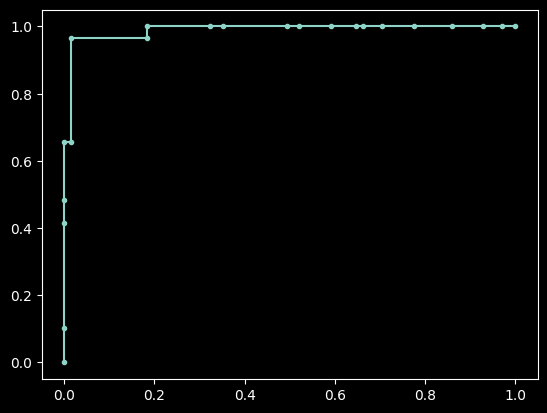

In [46]:
# plot the ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='Yes')

plt.plot(fpr, tpr, marker='.')

In [47]:
# look at the thresholds
thresholds

array([       inf, 1.        , 0.96279725, 0.96014203, 0.89426939,
       0.89414786, 0.46848012, 0.10255249, 0.09979603, 0.02905675,
       0.0273847 , 0.01082589, 0.0099515 , 0.00925099, 0.00911211,
       0.00884866, 0.00848755, 0.00597636, 0.00378819, 0.00302475,
       0.00162991, 0.00157046])

### Train K-nearest neighbors and Support Vector Machine Models

![image.png](metric_table.png)

### Train a k-nearest neighbors model and look at metrics

In [48]:
# train a KNN model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

knn_model

KNeighborsClassifier()

In [49]:
# get the predictions
y_pred_knn = knn_model.predict(X_test)

y_pred_knn

array(['No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No'], dtype=object)

In [52]:
# get the classification report
report_knn = classification_report(y_test, y_pred_knn, labels=['Yes', 'No'])

print(report_knn)

              precision    recall  f1-score   support

         Yes       0.95      0.62      0.75        29
          No       0.86      0.99      0.92        71

    accuracy                           0.88       100
   macro avg       0.91      0.80      0.84       100
weighted avg       0.89      0.88      0.87       100



In [53]:
# look at area under the ROC curve
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_prob_knn)

auc

0.9210781932977175

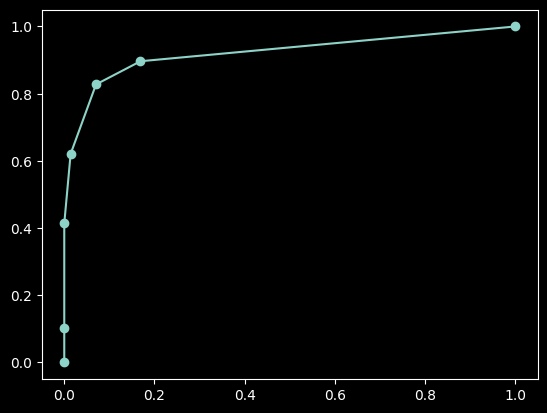

In [54]:
# plot the ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn, pos_label='Yes')

plt.plot(fpr_knn, tpr_knn, marker='o')


# Activity

### Train a support vector machine classifier model and look at metrics
Use the hyperparameters: C=0.01, class_weight='balanced', kernel='linear', gamma='scale' to match what was used in the paper

In [ ]:
# train an SVM classifier model
from sklearn.svm import SVC


In [ ]:
# get the predictions


In [ ]:
# get the classification report


In [ ]:
assert report_svm[75:78] == '.83'

In [ ]:
# look at area under the ROC curve


In [ ]:
assert roc_auc_svm > 0.921
assert roc_auc_svm < 0.922

In [ ]:
# plot the ROC curve
